<a href="https://colab.research.google.com/github/Akshithagg/NOOB-PROJECTS-1.0/blob/main/facedet2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

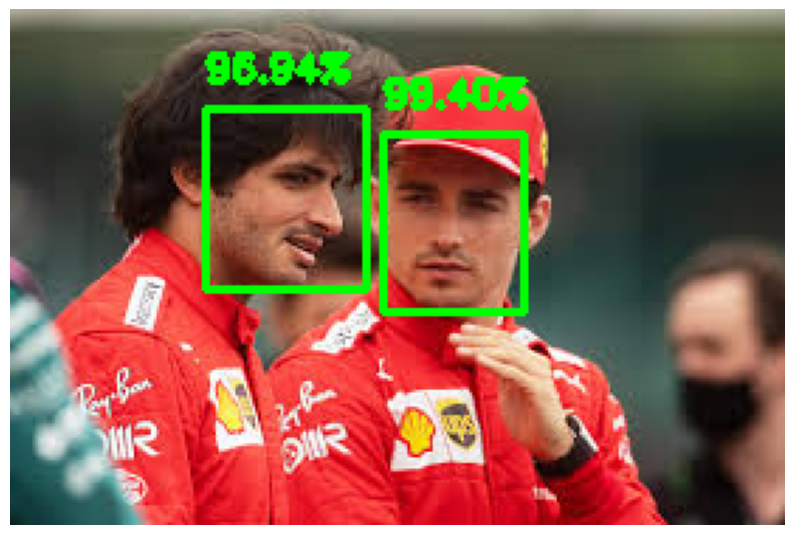

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# Load the image
img = cv2.imread("/content/f1.jpeg")
(h, w) = img.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))

net.setInput(blob)
detections = net.forward()

for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        text = f"{confidence * 100:.2f}%"
        y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.rectangle(img, (startX, startY), (endX, endY),
                      (0, 255, 0), 2)
        cv2.putText(img, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# Convert BGR image (OpenCV default) to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()



In [ ]:
!wget -O deploy.prototxt https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -O res10_300x300_ssd_iter_140000.caffemodel https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel


--2025-06-02 20:54:26--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

2025-06-02 20:54:27 (10.8 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-06-02 20:54:27--  https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_s